In [4]:
!pip install cufflinks

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import cufflinks as cf 
cf.go_offline() 
init_notebook_mode(connected=True)
from jupyterthemes import jtplot
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [6]:
telecom_df = pd.read_csv("telecom_churn.csv")

In [7]:
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [9]:
telecom_df.shape

(5000, 21)

In [10]:
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [11]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

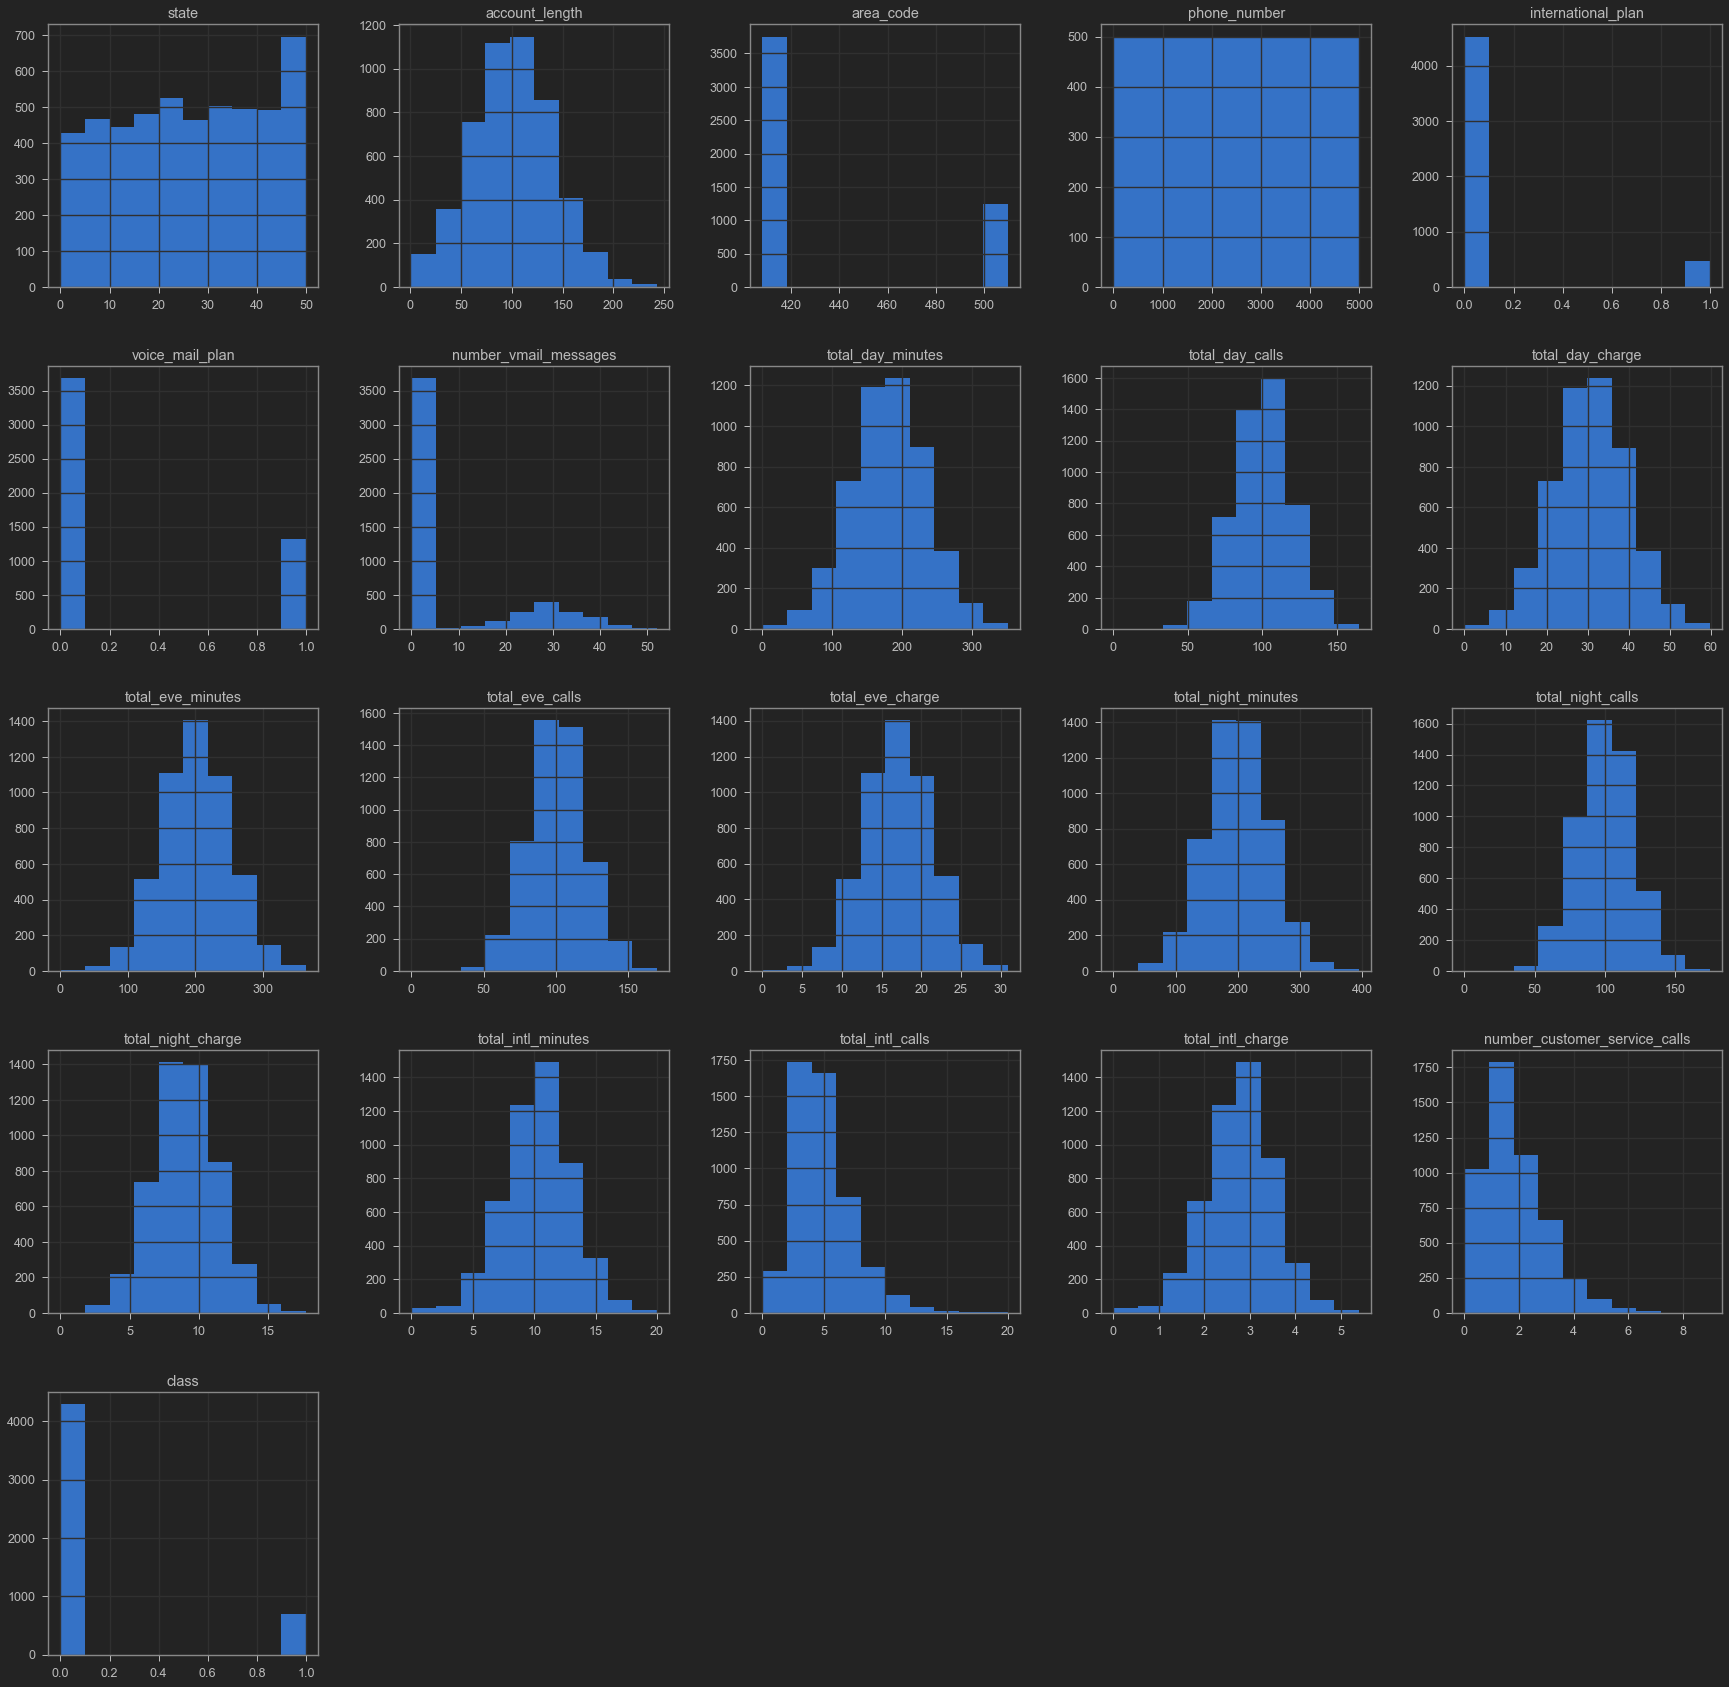

In [12]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [13]:
telecom_df["class"].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [14]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels = ["Exited (1)", "Retained (0)"], values = telecom_df["class"].value_counts())])
fig.show()

In [15]:
fig = px.histogram(telecom_df, x = "international_plan",
                  color = "class",
                  title = "International Plan service opted by the Telecom Customers")
fig.show()

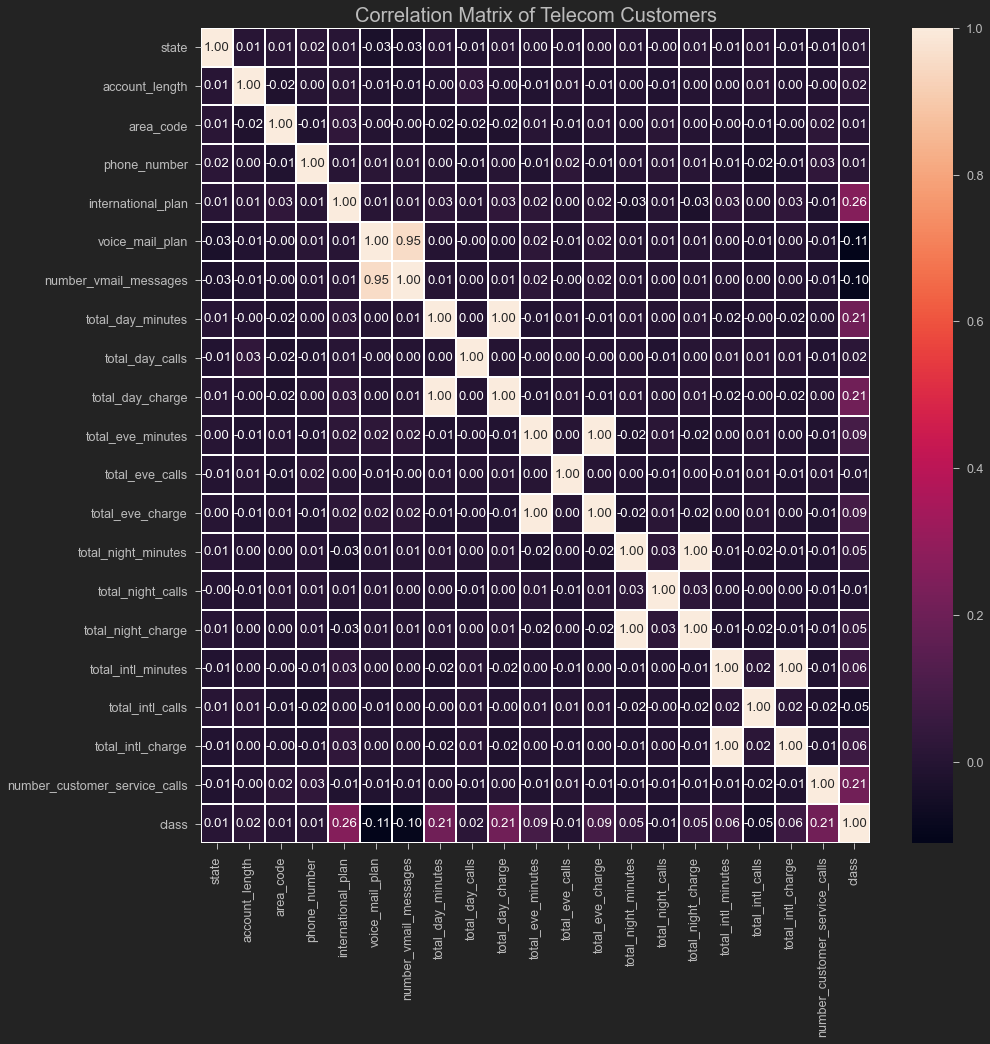

In [16]:
corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,linewidths = 1,annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Distribution of day charges by churn')

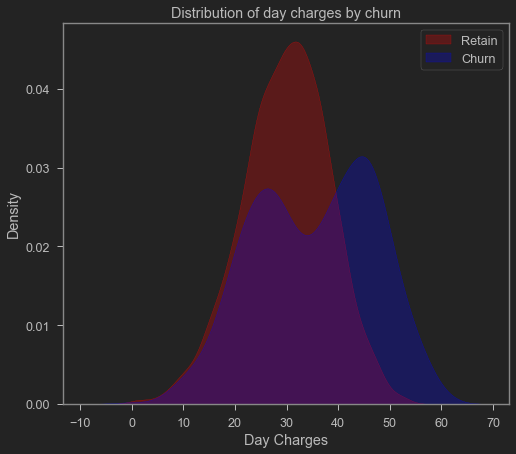

In [17]:
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

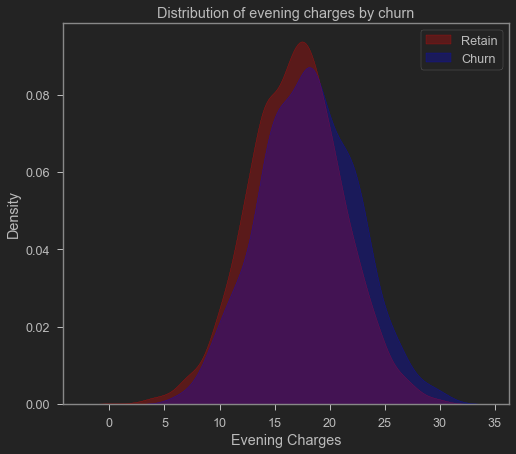

In [18]:
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

In [19]:
X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns")
y = telecom_df["class"]

In [20]:
X.shape

(5000, 18)

In [21]:
y.shape

(5000,)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

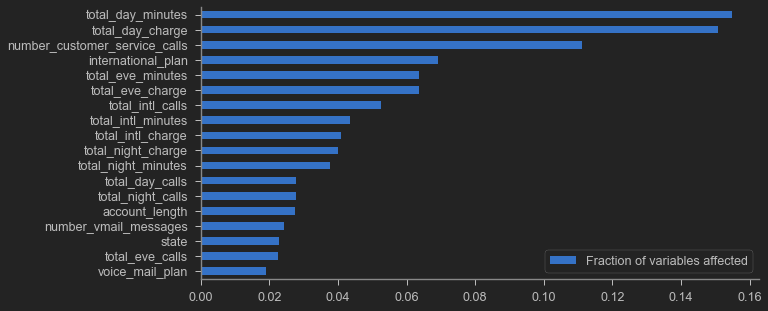

In [24]:
feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
        
model_LR.fit(X_train, y_train)

C:\Users\rajat1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [26]:
y_predict = model_LR.predict(X_test)

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.41      0.08      0.14       201

    accuracy                           0.86      1500
   macro avg       0.64      0.53      0.53      1500
weighted avg       0.81      0.86      0.82      1500



In [28]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc) 
model_svm.fit(X_train, y_train)

C:\Users\rajat1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\rajat1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\rajat1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\rajat1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\rajat1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=100000))

In [29]:
y_predict = model_svm.predict(X_test)

In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1299
           1       0.45      0.18      0.26       201

    accuracy                           0.86      1500
   macro avg       0.67      0.57      0.59      1500
weighted avg       0.83      0.86      0.83      1500



<AxesSubplot:>

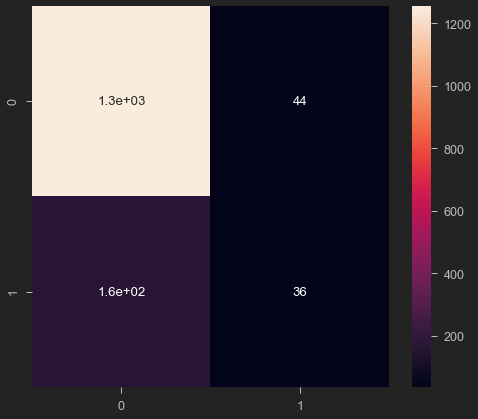

In [31]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [32]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_predict = model_rf.predict(X_test)

In [34]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.94      0.75      0.83       201

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.96      0.96      0.96      1500



<AxesSubplot:>

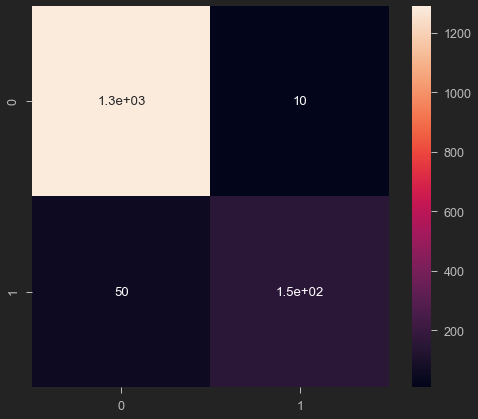

In [35]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_predict = model_knn.predict(X_test) 

In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1299
           1       0.67      0.25      0.37       201

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



<AxesSubplot:>

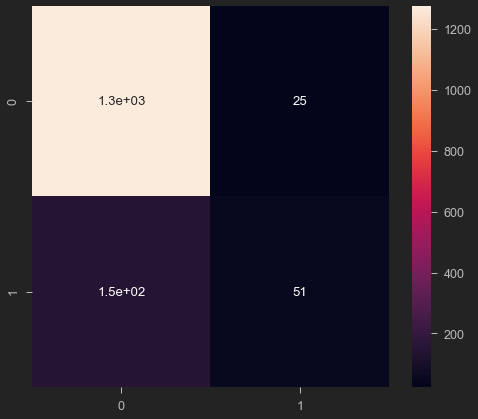

In [39]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [42]:
y_predict = model_gnb.predict(X_test)

In [43]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



<AxesSubplot:>

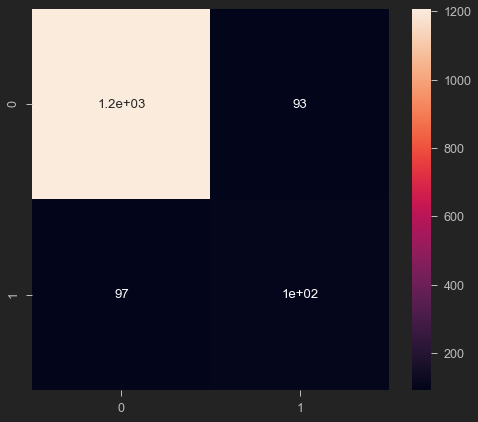

In [44]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [45]:
model_LR.predict_proba(X_test)

array([[0.9706767 , 0.0293233 ],
       [0.92583941, 0.07416059],
       [0.89967402, 0.10032598],
       ...,
       [0.9154519 , 0.0845481 ],
       [0.95135284, 0.04864716],
       [0.97562442, 0.02437558]])

In [46]:
model_LR.predict_proba(X_test)[:, 1]

array([0.0293233 , 0.07416059, 0.10032598, ..., 0.0845481 , 0.04864716,
       0.02437558])

In [47]:
y_test

4827    0
1793    0
2957    0
4218    0
2188    0
       ..
4230    1
3824    0
262     0
1100    0
4359    0
Name: class, Length: 1500, dtype: int64

In [48]:
from sklearn.metrics import roc_curve


In [49]:
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [50]:
fpr1

array([0.00000000e+00, 7.69822941e-04, 7.69822941e-04, 1.53964588e-03,
       1.53964588e-03, 2.30946882e-03, 2.30946882e-03, 4.61893764e-03,
       4.61893764e-03, 9.23787529e-03, 9.23787529e-03, 1.23171671e-02,
       1.23171671e-02, 1.46266359e-02, 1.46266359e-02, 1.53964588e-02,
       1.53964588e-02, 1.61662818e-02, 1.61662818e-02, 1.69361047e-02,
       1.69361047e-02, 1.77059276e-02, 1.77059276e-02, 1.84757506e-02,
       1.84757506e-02, 2.00153965e-02, 2.00153965e-02, 2.38645112e-02,
       2.38645112e-02, 2.46343341e-02, 2.46343341e-02, 2.69438029e-02,
       2.69438029e-02, 3.92609700e-02, 3.92609700e-02, 4.08006159e-02,
       4.08006159e-02, 4.15704388e-02, 4.15704388e-02, 4.31100847e-02,
       4.31100847e-02, 4.38799076e-02, 4.38799076e-02, 4.61893764e-02,
       4.61893764e-02, 4.69591994e-02, 4.69591994e-02, 4.77290223e-02,
       4.77290223e-02, 5.00384911e-02, 5.00384911e-02, 5.08083141e-02,
       5.08083141e-02, 5.23479600e-02, 5.23479600e-02, 5.92763664e-02,
      

In [51]:
tpr1

array([0.        , 0.        , 0.00497512, 0.00497512, 0.00995025,
       0.00995025, 0.01492537, 0.01492537, 0.02487562, 0.02487562,
       0.039801  , 0.039801  , 0.04477612, 0.04477612, 0.04975124,
       0.04975124, 0.05472637, 0.05472637, 0.05970149, 0.05970149,
       0.06965174, 0.06965174, 0.07960199, 0.07960199, 0.09452736,
       0.09452736, 0.09950249, 0.09950249, 0.10447761, 0.10447761,
       0.10945274, 0.10945274, 0.12437811, 0.12437811, 0.13432836,
       0.13432836, 0.14427861, 0.14427861, 0.14925373, 0.14925373,
       0.15920398, 0.15920398, 0.16915423, 0.16915423, 0.17910448,
       0.17910448, 0.1840796 , 0.1840796 , 0.19402985, 0.19402985,
       0.19900498, 0.19900498, 0.2039801 , 0.2039801 , 0.20895522,
       0.20895522, 0.21393035, 0.21393035, 0.21890547, 0.21890547,
       0.2238806 , 0.2238806 , 0.22885572, 0.22885572, 0.23383085,
       0.23383085, 0.24378109, 0.24378109, 0.25373134, 0.25373134,
       0.25870647, 0.25870647, 0.26368159, 0.26368159, 0.26865

In [52]:
thresh1

array([1.85366381, 0.85366381, 0.80604139, 0.77059282, 0.74727275,
       0.73917934, 0.72855008, 0.71486484, 0.69399231, 0.64482619,
       0.6335462 , 0.58472169, 0.58184498, 0.54617486, 0.5423061 ,
       0.54183375, 0.53388197, 0.53283353, 0.53270623, 0.53028017,
       0.51905114, 0.51493446, 0.5100675 , 0.50826744, 0.49839738,
       0.49630628, 0.4890091 , 0.47518728, 0.47286654, 0.4679266 ,
       0.46766626, 0.46610634, 0.45489652, 0.41319982, 0.41238137,
       0.41022022, 0.40694011, 0.40525561, 0.40430809, 0.4033768 ,
       0.40211712, 0.40186792, 0.39927533, 0.39568458, 0.39386252,
       0.39241353, 0.39139168, 0.39099849, 0.3854018 , 0.37943064,
       0.37810959, 0.37779257, 0.37526418, 0.3715977 , 0.36836574,
       0.36135518, 0.35782403, 0.3567002 , 0.35626871, 0.35161279,
       0.35071677, 0.35022456, 0.34885913, 0.34721577, 0.347136  ,
       0.34260089, 0.34102737, 0.3393656 , 0.33854408, 0.33495875,
       0.3349175 , 0.33473496, 0.33307284, 0.32942734, 0.32927

In [53]:
# ROC curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [54]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1)
print("Support Vector Machine: ", auc_score2)
print("Random Forest: ", auc_score3)
print("K-Nearest Neighbors: ", auc_score4)
print("Naive Bayes: ", auc_score5)

Logistic Regression:  0.6973408553843561
Support Vector Machine:  0.8027414888605472
Random Forest:  0.9033699860972274
K-Nearest Neighbors:  0.6563123566156898
Naive Bayes:  0.8270158062650564


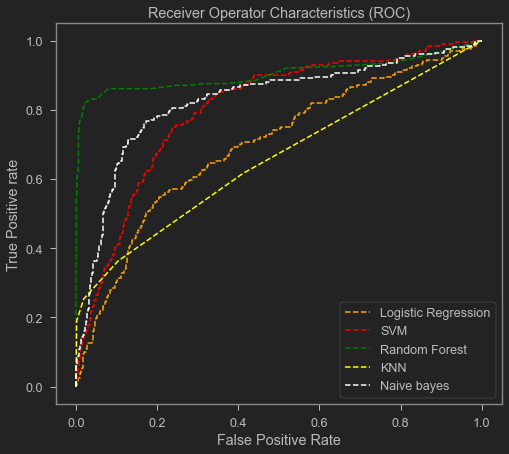

In [55]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

In [56]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.94      0.75      0.83       201

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.96      0.96      0.96      1500

